# Measuring intensity on label borders
In some applications it is reasonable to measure the intensity on label borders. For example, to measure the signal intensity in an image showing the nuclear envelope, one can segment nuclei, identify their borders and then measure the intensity there.

In [1]:
import numpy as np
from skimage.io import imread, imshow
import pyclesperanto_prototype as cle
from cellpose import models, io
from skimage import measure
import matplotlib.pyplot as plt

2022-02-24 10:05:10,405 [INFO] WRITING LOG OUTPUT TO C:\Users\rober\.cellpose\run.log


## The example dataset
In this example we load an image showing a zebrafish eye, courtesy of Mauricio Rocha Martins, Norden lab, MPI CBG Dresden.

In [2]:
multichannel_image = imread("../../data/zfish_eye.tif")
multichannel_image.shape

(1024, 1024, 3)

In [3]:
cropped_image = multichannel_image[200:600, 500:900]

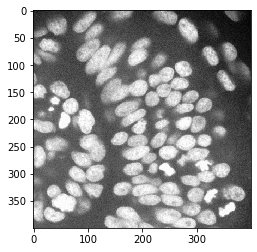

In [4]:
nuclei_channel = cropped_image[:,:,0]

cle.imshow(nuclei_channel)

## Image segmentation
First, we use cellpose to segment the cells

2022-02-24 10:05:10,623 [INFO] >>>> using CPU
2022-02-24 10:05:10,675 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-02-24 10:05:13,858 [INFO] estimated cell diameter(s) in 3.18 sec
2022-02-24 10:05:13,859 [INFO] >>> diameter(s) = 
2022-02-24 10:05:13,860 [INFO] [ 29.64 ]
2022-02-24 10:05:13,860 [INFO] ~~~ FINDING MASKS ~~~
2022-02-24 10:05:18,649 [INFO] >>>> TOTAL TIME 7.97 sec


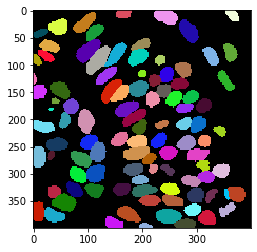

In [5]:
# load cellpose model
model = models.Cellpose(gpu=False, model_type='nuclei')

# apply model
channels = [0,0] # This means we are processing single channel greyscale images.
label_image, flows, styles, diams = model.eval(nuclei_channel, diameter=None, channels=channels)

# show result
cle.imshow(label_image, labels=True)

## Labeling pixels on label borders
Next, we will extract the outline of the segmented nuclei.

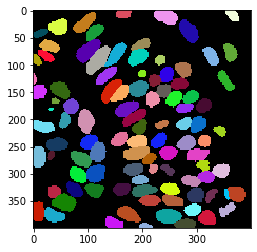

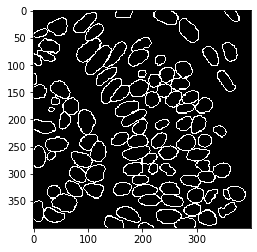

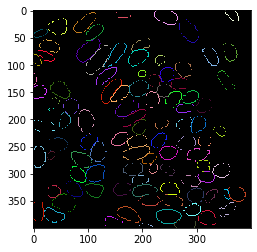

In [6]:
binary_borders = cle.detect_label_edges(label_image)

labeled_borders = binary_borders * label_image

cle.imshow(label_image, labels=True)
cle.imshow(binary_borders)
cle.imshow(labeled_borders, labels=True)

## Dilating outlines
We extend the outlines a bit to have a more robust measurement.

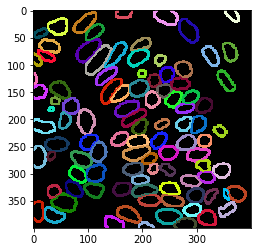

In [7]:
extended_outlines = cle.dilate_labels(labeled_borders, radius=2)

cle.imshow(extended_outlines, labels=True)

## Overlay visualization
Using this label image of nuclei outlines, we can measure the intensity in the nuclear envelope.

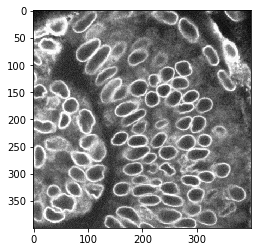

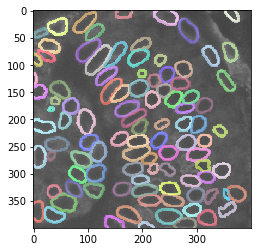

In [8]:
nuclear_envelope_channel = cropped_image[:,:,2]

cle.imshow(nuclear_envelope_channel)

cle.imshow(nuclear_envelope_channel, alpha=0.5, continue_drawing=True)
cle.imshow(extended_outlines, alpha=0.5, labels=True)

## Label intensity statistics
Measuring the intensity in the image works using the right intensty and label images.

In [9]:
stats = cle.statistics_of_labelled_pixels(nuclear_envelope_channel, extended_outlines)

stats["mean_intensity"]

array([35529.4  , 32835.07 , 36713.887, 37146.348, 49462.39 , 36392.6  ,
       37998.375, 48974.945, 31805.87 , 50451.793, 41006.047, 50854.016,
       36167.547, 41332.32 , 37815.766, 35121.38 , 43859.945, 40292.875,
       31583.992, 38933.57 , 32297.547, 39140.766, 37072.31 , 45990.57 ,
       39800.613, 37804.99 , 39092.43 , 39510.848, 40534.81 , 42057.293,
       44815.844, 42855.754, 38408.246, 41257.594, 37996.895, 38568.465,
       42331.266, 34748.973, 44219.844, 41986.086, 38606.215, 39008.094,
       36411.05 , 48155.797, 43781.97 , 38315.12 , 36048.39 , 37739.277,
       46268.816, 35808.32 , 37388.312, 37682.21 , 42932.72 , 38168.293,
       40489.73 , 43073.066, 40973.285, 40975.246, 39292.848, 38555.766,
       38219.785, 40054.242, 37356.87 , 45014.8  , 37211.668, 47025.47 ,
       30218.678, 33988.027, 37338.41 , 38500.85 , 38546.777, 40611.742,
       40391.453, 41024.46 , 37840.246, 41342.793, 39329.625, 43311.016,
       37829.074, 39949.82 , 39316.496, 40966.48 , 

## Parametric maps
These measurements can also be visualized using parametric maps

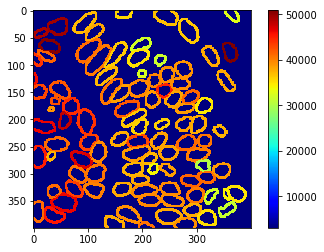

In [10]:
intensity_map = cle.mean_intensity_map(nuclear_envelope_channel, extended_outlines)
cle.imshow(intensity_map, min_display_intensity=3000, colorbar=True, colormap="jet")

## Exercise
Measure and visualizae the intensity at the label borders in the nuclei channel.